In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [ ]:
def ratings(rating):
    if rating >3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [ ]:
df['Rating']=df['Rating'].apply(ratings)

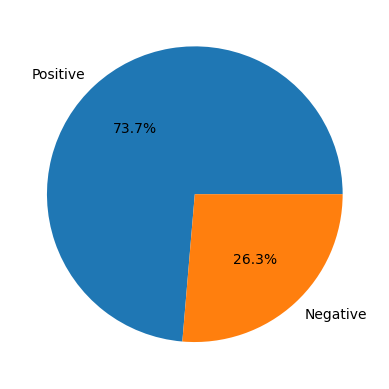

In [ ]:
plt.pie(df['Rating'].value_counts(),labels=df['Rating'].unique().tolist(),autopct='%1.1f%%')
plt.show()

In [ ]:
lenght=len(df['Review'][0])
print(f'Length of a sample review: {lenght}')


Length of a sample review: 593


In [ ]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [ ]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [ ]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [ ]:
df['Word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [ ]:
df['mean_word_length']=df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Review            20491 non-null  object 
 1   Rating            20491 non-null  object 
 2   Length            20491 non-null  int64  
 3   Word_count        20491 non-null  int64  
 4   mean_word_length  20491 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 800.6+ KB


In [ ]:
import re
from nltk.corpus import stopwords
def clean(review):
    review= review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [ ]:
df['Review']=df['Review'].apply(clean)
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,",,,,,,,,,,,",Positive,593,87,5.804598
1,",,,,,,,,,.,,/,.,,,,,.,.,,",Negative,1689,250,5.752000
2,"*'*.,,,'..,..',/,,,.,,,',',,.',,",Negative,1427,217,5.571429
3,",,,,,,,'/,,,,,',",Positive,600,89,5.730337
4,",,',,,,',,,,,',,,,',,,,,,,,.,,,,',,,,,',",Positive,1281,191,5.701571


In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['Review'][0]






'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
def corpus(text):

    text_list = text.split()

    return text_list

In [ ]:
df['Review_lists'] = df['Review'].apply(corpus)

df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay,, went, seahawk, gam..."


In [ ]:
from tqdm import trange

corpus = []

for i in trange(df.shape[0], ncols=150, nrows=10,

                colour='green', smoothing=0.8):

    corpus += df['Review_lists'][i]

len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 118473.59it/s]


2138765

In [ ]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)

mostCommon






[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [ ]:
words = []

freq = []

for word, count in mostCommon:

    words.append(word)

    freq.append(count)

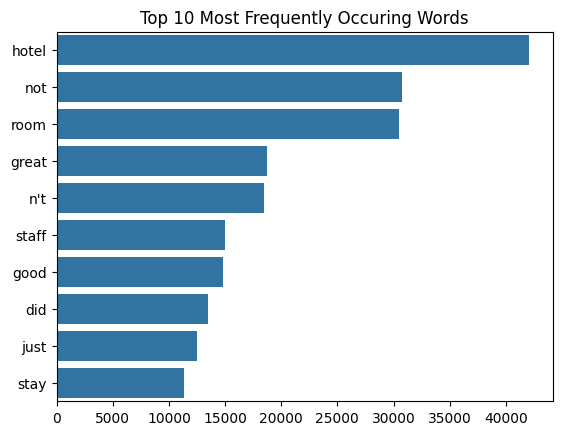

In [ ]:
import seaborn as sns

sns.barplot(x=freq, y=words)

plt.title('Top 10 Most Frequently Occuring Words')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))

bigrams = cv.fit_transform(df['Review'])

In [ ]:
count_values = bigrams.toarray().sum(axis=0)

ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()],

                                 reverse = True))

ngram_freq.columns = ["frequency", "ngram"]

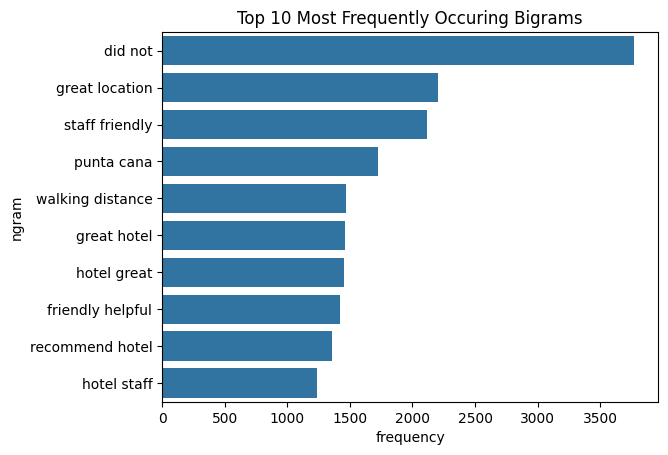

In [ ]:
import seaborn as sns

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])

plt.title('Top 10 Most Frequently Occuring Bigrams')

plt.show()

In [ ]:
# Define the documents

doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"
documents = [doc_trump, doc_election, doc_putin]

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)
# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Compute Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(df, df))

[[1.         0.51480485 0.38890873]
 [0.51480485 1.         0.38829014]
 [0.38890873 0.38829014 1.        ]]


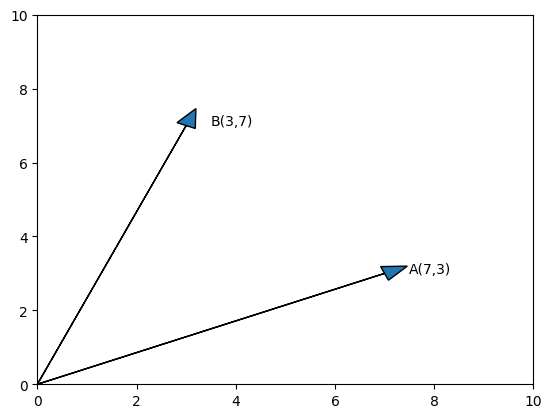

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# consider two vectors A and B in 2-D

A = np.array([7,3])

B = np.array([3,7])

ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)

plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))

ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)

plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))

plt.xlim(0,10)

plt.ylim(0,10)

plt.show()

plt.close()

In [ ]:
# cosine similarity between A and B

cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")

print (f"Cosine Distance between A and B:{1-cos_sim}")

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
C = A.intersection(B)
D = A.union(B)
print('AnB = ' , C)
print('AuB = ', D)
print('J(A,B) = ', float(len(C))/float(len(D)))

AnB =  {1, 2}
AuB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A,B) =  0.25


In [ ]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union
set_a = {"Language", "for", "Computer", "NLP", "Science"}
set_b = {"NLP", "for", "Language", "Data", 'ML', "AI"}
similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.375


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
]


In [ ]:
user_input = "How can I track my order?"

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]

In [ ]:
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [ ]:
most_similar_idx = np.argmax(cosine_similarities)

In [ ]:

print(f"User Query: {user_input}")
print(f"Most relevant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most relevant response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


In [ ]:
import io
import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer